In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sn

In [57]:
# training with 1 subject (test for how matrix should be set up)
os.chdir('/data/hcp_working_folder/tdhore2/riemann2/fc/TINN')
npzfile1 = np.load('fc_218.npz')
a=npzfile1['Arun1']
os.chdir('/data/hcp_working_folder/tdhore2/riemann2/fc/HLOS')
npzfile1 = np.load('fc_285.npz')
b=npzfile1['Arun1']
x=a[np.triu_indices(400, k = 1)]
y=b[np.triu_indices(400, k = 1)]
z=np.vstack((x, y))
x_train= z
y_train=[[1],[2]]
model = LinearRegression()
model.fit(x_train, y_train)
npzfile1 = np.load('fc_284.npz')
b= npzfile1['Arun1']
y=b[np.triu_indices(400, k = 1)]
y=y.reshape(1,79800)
model.predict((y))

In [2]:
# creating a logistic regression matrix
subs1 = ['218','216','150','276','130','132','274','135','136','286','292','182','233','157']
subs2 = ['285','284','191','298','201','230','243','250','253','270','271','273','226','189','299','125']
subs3 = ['200','169','168','167','166','199','220','258','259','126','261','123','122','120','117','113','275','115']
subs4 = ['131','140','257','277','279','280','282','108','106','293','105','129','256','247','146','184','187','188','174','163','197','162','160','205','255','207','213','219','222','223','154','227','153','152','246','176','208'] 
filenames = ['Arun1', 'Arun2', 'Brun1', 'Brun2']
fc_array = np.zeros([(14+16+18+37)*4, 79800])
count = 0
for sub in range(0,14):
    os.chdir('/data/hcp_working_folder/tdhore2/riemann2/fc/TINN')
    sub1 = subs1[sub]
    npzfile1 = np.load('fc_' + sub1 + '.npz')
    for pt in range(0,4):
        array = npzfile1[filenames[pt]]
        array=array[np.triu_indices(400, k = 1)]
        fc_array[count] = array
        count = count + 1

for sub in range(0,16):
    os.chdir('/data/hcp_working_folder/tdhore2/riemann2/fc/HLOS')
    sub2 = subs2[sub]
    npzfile2 = np.load('fc_' + sub2 + '.npz')
    for pt in range(0,4):
        array = npzfile2[filenames[pt]]
        array=array[np.triu_indices(400, k = 1)]
        fc_array[count] = array
        count = count + 1
        
for sub in range(0,18):
    os.chdir('/data/hcp_working_folder/tdhore2/riemann2/fc/CTRL')
    sub3 = subs3[sub]
    npzfile3 = np.load('fc_' + sub3 + '.npz')
    for pt in range(0,4):
        array = npzfile3[filenames[pt]]
        array=array[np.triu_indices(400, k = 1)]
        fc_array[count] = array
        count = count + 1
        
for sub in range(0,37):
    os.chdir('/data/hcp_working_folder/tdhore2/riemann2/fc/TNHL')
    sub4 = subs4[sub]
    npzfile4 = np.load('fc_' + sub4 + '.npz')
    for pt in range(0,4):
        array = npzfile4[filenames[pt]]
        array=array[np.triu_indices(400, k = 1)]
        fc_array[count] = array
        count = count + 1

In [3]:
# assembling the matrix
array1 = np.ones([14*4,1])
array2 = 2*np.ones([16*4,1])
array3 = 3*np.ones([18*4,1])
array4 = 4*np.ones([37*4,1])
name_array = np.vstack((array1, array2, array3, array4))
np.reshape(name_array, [340,])
print(np.shape(name_array))

(340, 1)


In [30]:
# creating the test/train split
X_train,X_test,y_train,y_test = train_test_split(fc_array,name_array,test_size=0.05,random_state=1)  

In [ ]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', penalty='l2')

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

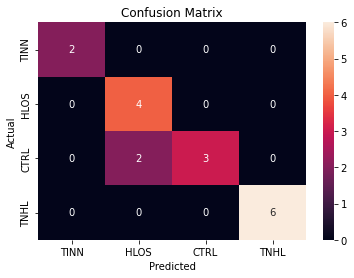

In [32]:
# plotting confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['TINN','HLOS','CTRL','TNHL']],
                  columns = [i for i in ['TINN','HLOS','CTRL','TNHL']])
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 

In [33]:
# printing accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8823529411764706


In [ ]:
# K Bins (did not work)
enc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy='kmeans')
enc.fit(fc_array)

In [34]:
# K Means
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

model = KMeans(n_clusters=4)

model = model.fit(scale(X_train)) # data is your training data

print(model.labels_) # prints labels for clusters. you can map to meaningful labels
z =model.predict(scale(X_test)) # test is your data to predict the cluster


[3 3 3 3 0 0 3 3 0 1 0 3 0 0 3 1 1 3 0 1 2 1 0 3 0 0 0 0 3 2 3 3 0 3 0 0 1
 0 1 3 0 3 0 3 3 0 3 0 1 1 0 3 1 3 3 3 0 3 1 0 3 1 1 0 0 0 3 1 0 0 0 0 0 3
 0 0 0 0 0 0 3 0 3 3 3 3 0 1 3 3 0 3 3 2 0 0 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0
 3 0 3 0 0 3 3 0 3 3 3 0 1 2 3 3 1 0 3 0 3 0 3 3 0 0 3 0 3 3 1 0 3 3 0 0 2
 0 0 3 0 0 3 0 0 3 0 0 1 0 0 3 3 1 2 3 3 0 0 3 3 0 0 3 3 0 1 3 0 3 0 1 1 3
 0 0 3 1 3 3 0 3 0 3 0 2 3 3 3 0 3 0 3 0 3 3 3 3 2 0 0 0 3 0 3 3 3 3 0 3 1
 3 1 3 0 1 3 0 3 3 1 3 3 3 3 3 3 1 3 0 0 1 1 0 3 0 3 1 2 1 0 0 3 0 0 3 0 3
 1 0 3 0 0 3 1 0 0 3 0 3 0 3 0 3 3 3 3 1 0 0 3 0 3 3 3 0 3 3 0 3 3 3 0 3 0
 3 1 0 0 3 3 1 3 1 0 0 3 3 0 3 0 1 0 3 1 0 1 1 3 3 3 3]
[3 0 0 3 0 3 0 3 3 1 0 3 0 1 3 0 1]


In [88]:
# polynomial
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(fc_array)
poly_features.shape

MemoryError: Unable to allocate 7.88 TiB for an array with shape (340, 3184139700) and data type float64